# part2 resume w adding terms -------------->

# adding interaction & squared terms for better results in LR

In [3]:
import pandas as pd

In [4]:
#extract x&y
train_data = pd.read_csv('train_data.csv')
X_train_selected = train_data.drop(columns=['y1_train', 'y2_train'])
y1_train = train_data['y1_train']
y2_train = train_data['y2_train']

val_data = pd.read_csv('val_data.csv')
X_val_selected = val_data.drop(columns=['y1_val', 'y2_val'])
y1_val = val_data['y1_val']
y2_val = val_data['y2_val']

test_data = pd.read_csv('test_data.csv')
X_test_selected = test_data.drop(columns=['y1_test', 'y2_test'])
y1_test = test_data['y1_test']
y2_test = test_data['y2_test']

In [16]:
X_train_selected
# X_val_selected
# X_test_selected
# y2_train
# y2_val
# y2_test

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517
...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751


In [6]:
#extract top 10 features from part1
X_train_selected_lr =X_train_selected.copy()
X_val_selected_lr = X_val_selected.copy()
X_test_selected_lr = X_test_selected.copy()

top_features = X_train_selected_lr.columns
top_features

Index(['Ice vol mean radius, Mean (um)', 'Total contrail EF (J)',
       'Temp initial, Mean (K)', 'Tau cirrus, Mean',
       'Ice number initial, Mean (m-1)', 'RF LW (W m-2)', 'RF SW (W m-2)',
       'RHi initial, Mean', 'Mean nvPM number EI (kg-1)',
       'Tau contrail, Mean'],
      dtype='object')

In [7]:
#X input for LR - add iteraction & squared terms to address heteroscadasticity & non-linearity in LR 

#add interaction terms for top 10 features
for i, featureA in enumerate(top_features):
    for j, featureB in enumerate(top_features):
        if i < j:
            name = f"{featureA}_x_{featureB}"
            X_train_selected_lr[name] = X_train_selected_lr[featureA] * X_train_selected_lr[featureB]
            X_val_selected_lr[name] = X_val_selected_lr[featureA] * X_val_selected_lr[featureB]
            X_test_selected_lr[name] = X_test_selected_lr[featureA] * X_test_selected_lr[featureB]

#add squared terms for top 10 features
for feature in top_features:
    name = f"{feature}^2"
    X_train_selected_lr[name] = X_train_selected_lr[feature] ** 2
    X_val_selected_lr[name] = X_val_selected_lr[feature] ** 2
    X_test_selected_lr[name] = X_test_selected_lr[feature] ** 2

In [10]:
X_train_selected_lr

,"Ice vol mean radius, Mean (um)",Total contrail EF (J),"Temp initial, Mean (K)","Tau cirrus, Mean","Ice number initial, Mean (m-1)",RF LW (W m-2),RF SW (W m-2),"RHi initial, Mean",Mean nvPM number EI (kg-1),"Tau contrail, Mean",...,"Ice vol mean radius, Mean (um)^2",Total contrail EF (J)^2,"Temp initial, Mean (K)^2","Tau cirrus, Mean^2","Ice number initial, Mean (m-1)^2",RF LW (W m-2)^2,RF SW (W m-2)^2,"RHi initial, Mean^2",Mean nvPM number EI (kg-1)^2,"Tau contrail, Mean^2"
0,8.104943,-9.803122e+13,211.988027,0.059461,8.171083e+11,1.274654,-2.136018,0.965391,9.737014e+14,0.032228,...,65.690098,9.610120e+27,44938.923694,0.003536,6.676659e+23,1.624744,4.562573,0.931979,9.480945e+29,0.001039
1,11.396851,6.526151e+14,214.539888,0.230156,4.825063e+12,2.709673,-0.462785,1.077596,1.409608e+15,0.086032,...,129.888210,4.259064e+29,46027.363661,0.052972,2.328124e+25,7.342329,0.214170,1.161214,1.986995e+30,0.007402
2,1.174947,-6.665474e+11,206.463294,0.017427,4.640423e+12,0.447756,-0.318402,0.934291,1.517921e+15,0.045242,...,1.380502,4.442854e+23,42627.091854,0.000304,2.153352e+25,0.200485,0.101380,0.872900,2.304084e+30,0.002047
3,5.127562,6.506736e+13,210.716904,0.024615,2.980002e+12,1.514753,-1.687507,1.118627,5.143456e+14,0.046715,...,26.291895,4.233761e+27,44401.613593,0.000606,8.880411e+24,2.294476,2.847681,1.251325,2.645514e+29,0.002182
4,14.515607,1.870152e+13,223.596470,0.348228,3.710018e+12,4.307649,-2.705854,1.201717,5.576476e+14,0.222517,...,210.702857,3.497468e+26,49995.381413,0.121263,1.376424e+25,18.555836,7.321647,1.444123,3.109708e+29,0.049514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213655,6.287990,-5.848262e+13,205.665296,0.037373,4.442903e+12,3.004852,-3.928538,1.026555,3.800872e+14,0.035124,...,39.538822,3.420217e+27,42298.214106,0.001397,1.973939e+25,9.029133,15.433409,1.053815,1.444663e+29,0.001234
213656,13.782106,2.838121e+14,220.456859,0.151028,2.869579e+12,9.203848,-4.468458,1.199525,5.534915e+14,0.267492,...,189.946435,8.054931e+28,48601.226511,0.022809,8.234485e+24,84.710820,19.967120,1.438860,3.063528e+29,0.071552
213657,6.192778,4.031556e+14,208.486587,0.128156,4.726921e+12,2.685974,-1.603496,1.024720,1.132473e+15,0.066817,...,38.350504,1.625344e+29,43466.657040,0.016424,2.234378e+25,7.214457,2.571200,1.050050,1.282496e+30,0.004465
213658,0.448273,0.000000e+00,215.152319,0.000000,2.826432e+12,0.879319,-7.044063,0.865739,1.249643e+15,0.081751,...,0.200948,0.000000e+00,46290.520266,0.000000,7.988718e+24,0.773202,49.618823,0.749503,1.561608e+30,0.006683


# standardisation

In [11]:
#standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaled for RF
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

#scaled for LR
X_train_scaled_lr = scaler.fit_transform(X_train_selected_lr)
X_val_scaled_lr = scaler.transform(X_val_selected_lr)
X_test_scaled_lr = scaler.transform(X_test_selected_lr)

# modelling

## 0. majority vote

In [38]:
##### to add #####

## 1. linear regression

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
# #predict "Persistent contrail length (km)" - y1
# reg1 = LinearRegression()
# reg1.fit(X_train_scaled_lr, y1_train)
# y1_pred = reg1.predict(X_val_scaled_lr)

# r2_y1 = r2_score(y1_val, y1_pred)
# mse_y1 = mean_squared_error(y1_val, y1_pred)

# print(f"Performance for 'Persistent contrail length (km)':")
# print(f"R2 Score: {r2_y1:.4f}")
# print(f"Mean Squared Error: {mse_y1:.4f}\n")

In [47]:
#predict "Contrail age, Mean (h)" - y2

from sklearn.metrics import mean_absolute_error

reg2 = LinearRegression()
reg2.fit(X_train_scaled_lr, y2_train)

#evaluate val
y2_pred_val = reg2.predict(X_val_scaled_lr)
r2_val = r2_score(y2_val, y2_pred_val)
rmse_val = np.sqrt(mean_squared_error(y2_val, y2_pred_val))
mae_val = mean_absolute_error(y2_val, y2_pred_val)

print("Performance on Validation Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_val:.4f}")
print(f"Mean Squared Error: {rmse_val:.4f}")
print(f"Mean Absolute Error: {mae_val:.4f}")

#evaluate test
y2_pred_test = reg2.predict(X_test_scaled_lr)
r2_test = r2_score(y2_test, y2_pred_test)
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
mae_test = mean_absolute_error(y2_test, y2_pred_test)

print("\nPerformance on Test Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_test:.4f}")
print(f"Mean Squared Error: {rmse_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")

Performance on Validation Data for 'Contrail age, Mean (h)':
R2 Score: 0.7229
Mean Squared Error: 1.0574
Mean Absolute Error: 0.7673

Performance on Test Data for 'Contrail age, Mean (h)':
R2 Score: 0.7293
Mean Squared Error: 1.0485
Mean Absolute Error: 0.7661


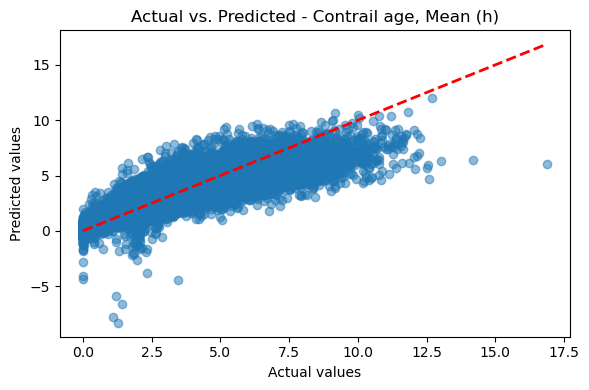

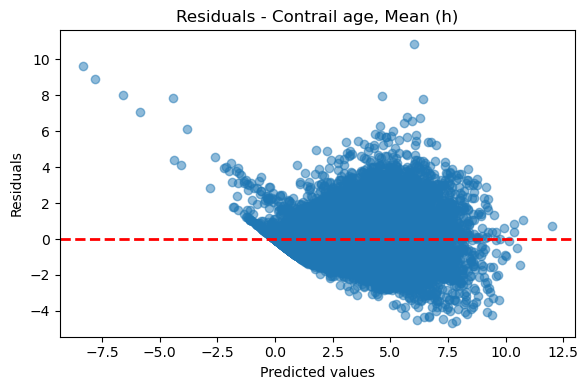

In [21]:
# 1. scatterplot of Actual vs. Predicted values
plt.figure(figsize=(6, 4))

# #'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# plt.scatter(y1_val, y1_pred, alpha=0.5)
# plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
# plt.title("Actual vs. Predicted - Persistent contrail length (km)")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")

#'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
plt.scatter(y2_test, y2_pred_test, alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], '--', lw=2, color='red')
plt.title("Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

# #'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# residuals1 = y1_val - y1_pred
# plt.scatter(y1_pred, residuals1, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', lw=2)
# plt.title("Residuals - Persistent contrail length (km)")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")

#'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
residuals2 = y2_test - y2_pred_test
plt.scatter(y2_pred_test, residuals2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 2. random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
# #'Persistent contrail length (km)' - y1
# rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
# rf1.fit(X_train_scaled, y1_train)
# y1_pred_rf = rf1.predict(X_val_scaled)

# #evaluate rf
# mse1_rf = mean_squared_error(y1_val, y1_pred_rf)
# r2_1_rf = r2_score(y1_val, y1_pred_rf)
# print(f"Random Forest Metrics for 'Persistent contrail length (km)': MSE = {mse1_rf}, R2 = {r2_1_rf}")

In [22]:
#'Contrail age, Mean (h)' - y2 wo added terms - takes 30mins!!!!
# #predict using best model
# y2_pred_best_rf = best_rf.predict(X_val_scaled)

# #evaluate y2 best model
# mse2_best_rf = mean_squared_error(y2_val, y2_pred_best_rf)
# r2_2_best_rf = r2_score(y2_val, y2_pred_best_rf)
# print(f"Optimized RandomForest Metrics for 'Contrail age, Mean (h)': MSE = {mse2_best_rf}, R2 = {r2_2_best_rf}")
# print("Best parameters:", best_params)

# rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
# rf2.fit(X_train_scaled, y2_train)  #- takes 30mins!!!!
# y2_pred_rf = rf2.predict(X_val_scaled)

# #evaluate rf
# mse2_rf = mean_squared_error(y2_val, y2_pred_rf)
# r2_2_rf = r2_score(y2_val, y2_pred_rf)
# print(f"Random Forest Metrics for 'Persistent contrail length (km)': MSE = {mse2_rf}, R2 = {r2_2_rf}")

In [ ]:
#'Contrail age, Mean (h)' - y2 w added terms - takes 30mins!!!!
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train_scaled, y2_train) #- takes 30mins!!!!

In [46]:
from sklearn.metrics import mean_absolute_error

#evaluate val
y2_pred_val = rf2.predict(X_val_scaled)
r2_val = r2_score(y2_val, y2_pred_val)
rmse_val = np.sqrt(mean_squared_error(y2_val, y2_pred_val))
mae_val = mean_absolute_error(y2_val, y2_pred_val)

print("Performance on Validation Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_val:.4f}")
print(f"Mean Squared Error: {rmse_val:.4f}")
print(f"Mean Absolute Error: {mae_val:.4f}")

#evaluate test
y2_pred_test = rf2.predict(X_test_scaled)
r2_test = r2_score(y2_test, y2_pred_test)
rmse_test = np.sqrt(mean_squared_error(y2_test, y2_pred_test))
mae_test = mean_absolute_error(y2_test, y2_pred_test)

print("\nPerformance on Test Data for 'Contrail age, Mean (h)':")
print(f"R2 Score: {r2_test:.4f}")
print(f"Mean Squared Error: {rmse_test:.4f}")
print(f"Mean Absolute Error: {mae_test:.4f}")

Performance on Validation Data for 'Contrail age, Mean (h)':
R2 Score: 0.7941
Mean Squared Error: 0.9114
Mean Absolute Error: 0.6443

Performance on Test Data for 'Contrail age, Mean (h)':
R2 Score: 0.8002
Mean Squared Error: 0.9006
Mean Absolute Error: 0.6380


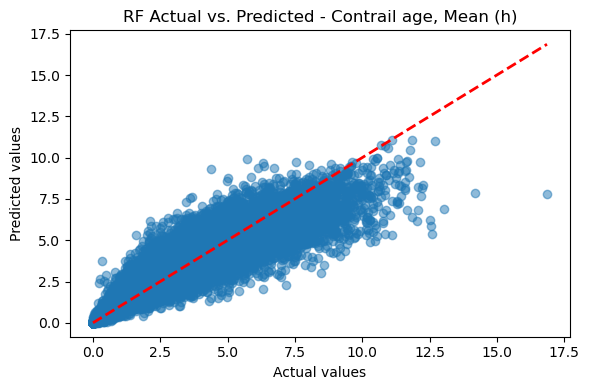

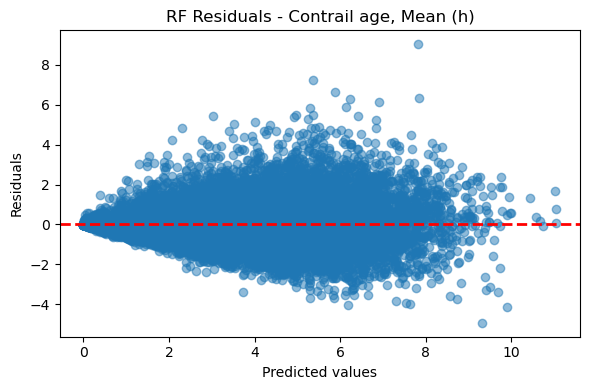

In [28]:
# 1. scatterplots of actual vs. predicted values - w added terms
plt.figure(figsize=(6, 4))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# plt.scatter(y1_val, y1_pred_rf, alpha=0.5)
# plt.plot([min(y1_val), max(y1_val)], [min(y1_val), max(y1_val)], '--', lw=2, color='red')
# plt.title("RF Actual vs. Predicted - Persistent contrail length (km)")
# plt.xlabel("Actual values")
# plt.ylabel("Predicted values")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
plt.scatter(y2_test, y2_pred_test, alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], '--', lw=2, color='red')
plt.title("RF Actual vs. Predicted - Contrail age, Mean (h)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.tight_layout()
plt.show()

# 2. residualplots
plt.figure(figsize=(6, 4))

# # For 'Persistent contrail length (km)'
# plt.subplot(1, 2, 1)
# residuals1_rf = y1_val - y1_pred_rf
# plt.scatter(y1_pred_rf, residuals1_rf, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--', lw=2)
# plt.title("RF Residuals - Persistent contrail length (km)")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")

# For 'Contrail age, Mean (h)'
plt.subplot(1, 1, 1)
residuals2_rf_lr = y2_test - y2_pred_test
plt.scatter(y2_pred_test, residuals2_rf_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("RF Residuals - Contrail age, Mean (h)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

## 3. xgboost

In [29]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/63/ca/37b83f59b0efd919c03c52ad7e2473dced674f2f6eb07b9d6f7d80e4c54c/xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [45]:
#Gradient boosting improved over LR wo added terms - slightly BETTER results
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg.fit(X_train_scaled, y2_train)
y2_pred_xgb = xgb_reg.predict(X_val_scaled)

mse2_xgb = mean_squared_error(y2_val, y2_pred_xgb)
r2_2_xgb = r2_score(y2_val, y2_pred_xgb)
print(f"XGBoost Metrics for 'Contrail age, Mean (h)': MSE = {mse2_xgb}, R2 = {r2_2_xgb}")

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

#fit train data
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg.fit(X_train_scaled, y2_train)

#evaluate val data 
y2_pred_xgb_val = xgb_reg.predict(X_val_scaled)
rmse2_xgb_val = np.sqrt(mean_squared_error(y2_val, y2_pred_xgb_val))
mae2_xgb_val = mean_absolute_error(y2_val, y2_pred_xgb_val)
r2_2_xgb_val = r2_score(y2_val, y2_pred_xgb_val)
print(f"XGBoost Validation Metrics for 'Contrail age, Mean (h)': RMSE = {rmse2_xgb_val}, MAE = {mae2_xgb_val}, R2 = {r2_2_xgb_val}")

#evaluate test data
y2_pred_xgb_test = xgb_reg.predict(X_test_scaled)
rmse2_xgb_test = np.sqrt(mean_squared_error(y2_test, y2_pred_xgb_test))
mae2_xgb_test = mean_absolute_error(y2_test, y2_pred_xgb_test)
r2_2_xgb_test = r2_score(y2_test, y2_pred_xgb_test)
print(f"XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = {rmse2_xgb_test}, MAE = {mae2_xgb_test}, R2 = {r2_2_xgb_test}")

XGBoost Metrics for 'Contrail age, Mean (h)': MSE = 0.8461751739645614, R2 = 0.7902992810152407
XGBoost Validation Metrics for 'Contrail age, Mean (h)': RMSE = 0.9198778038220954, MAE = 0.6546613321656963, R2 = 0.7902992810152407
XGBoost Test Metrics for 'Contrail age, Mean (h)': RMSE = 0.9096731776834164, MAE = 0.6476294264742669, R2 = 0.7962154851203076


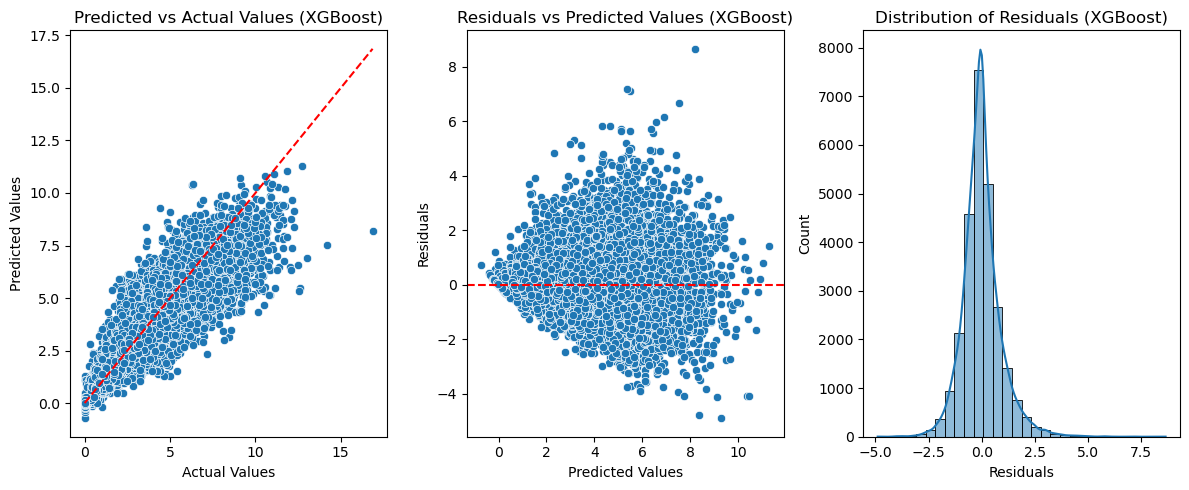

In [32]:
#evaluation wo added terms

import seaborn as sns

residuals_xgb = y2_test - y2_pred_xgb_test
plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_test, y=y2_pred_xgb_test)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost)')

#residuals vs predicted
plt.subplot(1, 3, 2)
sns.scatterplot(x=y2_pred_xgb_test, y=residuals_xgb)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (XGBoost)')

#residual dist
plt.subplot(1, 3, 3)
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (XGBoost)')

plt.tight_layout()
plt.show()

## 4. FFNN

In [33]:
!pip install keras 

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [34]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/p

In [49]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error

#w added terms
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train_scaled_lr.shape[1], activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train_scaled_lr, y2_train, epochs=5, batch_size=10, validation_data=(X_val_scaled_lr, y2_val))

y2_pred_nn2 = model2.predict(X_test_scaled_lr)

rmse2_nn2 = np.sqrt(mean_squared_error(y2_test, y2_pred_nn2))
mae2_nn2 = mean_absolute_error(y2_test, y2_pred_nn2)
r2_2_nn2 = r2_score(y2_test, y2_pred_nn2)
print(f"Neural Network Metrics for 'Contrail age, Mean (h)': RMSE = {rmse2_nn2}, MAE = {mae2_nn2}, R2 = {r2_2_nn2}")  #on test data

Epoch 1/5
21366/21366 [==============================] - 22s 1ms/step - loss: 1.0393 - val_loss: 0.9547
Epoch 2/5
21366/21366 [==============================] - 22s 1ms/step - loss: 0.9160 - val_loss: 0.9201
Epoch 3/5
21366/21366 [==============================] - 22s 1ms/step - loss: 0.8946 - val_loss: 0.9304
Epoch 4/5
21366/21366 [==============================] - 21s 1ms/step - loss: 0.8807 - val_loss: 0.8855
Epoch 5/5
835/835 [==============================] - 1s 684us/step
Neural Network Metrics for 'Contrail age, Mean (h)': RMSE = 0.9325675312232087, MAE = 0.6637429872361638, R2 = 0.7858288431680693


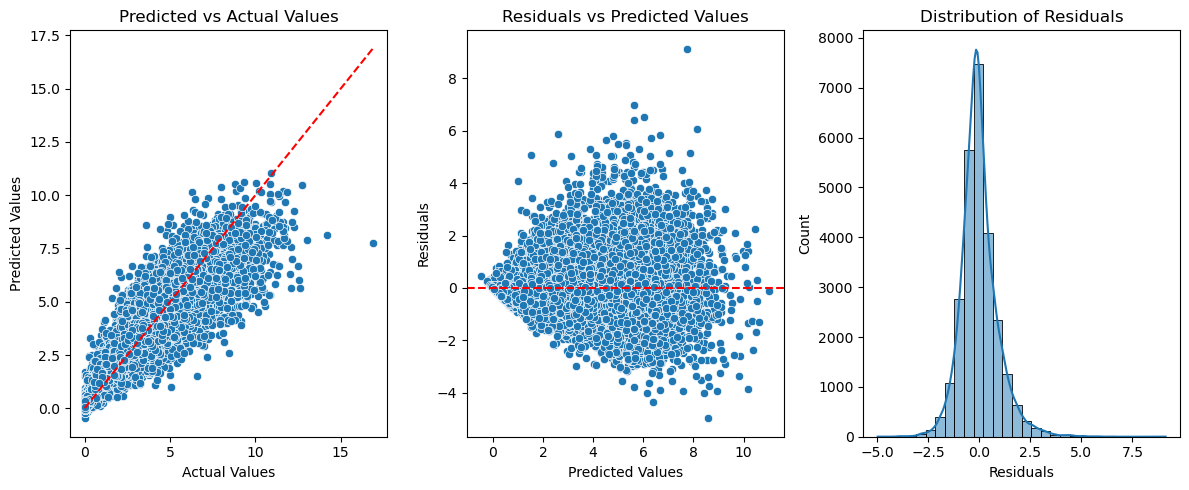

In [36]:
#evaluation - w added terms
import seaborn as sns

residuals = y2_test - y2_pred_nn2.ravel()
plt.figure(figsize=(12, 5))

#predicted vs actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y2_test, y=y2_pred_nn2.ravel())
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

#residuals vs predicted
plt.subplot(1, 3, 2)
sns.scatterplot(x=y2_pred_nn2.ravel(), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

#residuals dist
plt.subplot(1, 3, 3)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

## 5. gamma regression

In [48]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import log as log_link
from sklearn.metrics import mean_absolute_error

#add constant to the features
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_val_scaled_const = sm.add_constant(X_val_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

#create & fit Gamma regression model with log link function
gamma_model = GLM(y2_train, X_train_scaled_const, family=Gamma(link=log_link()))
gamma_results = gamma_model.fit()
print(gamma_results.summary())

#evaluate validation data
y2_pred_gamma_val = gamma_results.predict(X_val_scaled_const)
# r2_gamma_val = r2_score(y2_val, y2_pred_gamma_val)  #-ve
rmse_gamma_val = np.sqrt(mean_squared_error(y2_val, y2_pred_gamma_val))
mae_gamma_val = mean_absolute_error(y2_val, y2_pred_gamma_val)
print(f"Gamma Regression Validation Metrics: MSE = {rmse_gamma_val}, MAE = {mae_gamma_val}")

#evaluate test data
y2_pred_gamma_test = gamma_results.predict(X_test_scaled_const)
# r2_gamma_test = r2_score(y2_test, y2_pred_gamma_test)  #-ve
rmse_gamma_test = np.sqrt(mean_squared_error(y2_test, y2_pred_gamma_test))
mae_gamma_test = mean_absolute_error(y2_test, y2_pred_gamma_test)
print(f"Gamma Regression Test Metrics: MSE = {rmse_gamma_test}, MAE = {mae_gamma_test}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:               y2_train   No. Observations:               213660
Model:                            GLM   Df Residuals:                   213649
Model Family:                   Gamma   Df Model:                           10
Link Function:                    log   Scale:                         0.27083
Method:                          IRLS   Log-Likelihood:            -4.4563e+05
Date:                Tue, 14 Nov 2023   Deviance:                   1.0312e+05
Time:                        14:08:20   Pearson chi2:                 5.79e+04
No. Iterations:                    40   Pseudo R-squ. (CS):             0.5534
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1477      0.001   1019.390      0.0